# Tasca 5-2
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

- Exercici 1: Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

- Exercici 2: Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

- Exercici 3: Resumeix les noves columnes generades de manera estadística i gràfica


## Exercici 1:

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 dolars
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in 1000's of dolars

Comencem carregant el csv. Hem de posar nosaltres el nom de les columnes. Farem una descripció del dataset per sobre abans de separar el conjunt de dades en train i test. 

In [1]:
import pandas as pd

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 5\SkLearn_Train_Test\housing data.csv', names=colnames, header=None)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [7]:
df['CHAS'].unique()

array([0, 1], dtype=int64)

In [8]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

Hem vist que no hi han nan's ni nulls.

Observem que CHAS és binari: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). RAD (index of accessibility to radial highways) és un index. Els considerarem categorics.

De cara a l'exercici 2, amb la columna TAX i NOX farem unes columnes dummies que diran si el lloc esta molt imposat o més aviat exempt en funcio dels quartils i si està contaminat o no en funció d'un valor arbitrari (la mitjana).

Farem un cop d'ull a veure si hi ha alguna distribució probablement gaussiana.

In [9]:
from scipy.stats import shapiro
non_gaussians_list = []

for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df[name])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} is probably Gaussian'.format(name))
            
        else:
            print('{} is probably not Gaussian'.format(name))
            non_gaussians_list.append(name)

print('\nLes següents variables són probablement no gausianes: ', non_gaussians_list)

stat=0.450, p=0.000
CRIM is probably not Gaussian
stat=0.556, p=0.000
ZN is probably not Gaussian
stat=0.900, p=0.000
INDUS is probably not Gaussian
stat=0.275, p=0.000
CHAS is probably not Gaussian
stat=0.936, p=0.000
NOX is probably not Gaussian
stat=0.961, p=0.000
RM is probably not Gaussian
stat=0.892, p=0.000
AGE is probably not Gaussian
stat=0.903, p=0.000
DIS is probably not Gaussian
stat=0.680, p=0.000
RAD is probably not Gaussian
stat=0.815, p=0.000
TAX is probably not Gaussian
stat=0.904, p=0.000
PTRATIO is probably not Gaussian
stat=0.477, p=0.000
B is probably not Gaussian
stat=0.937, p=0.000
LSTAT is probably not Gaussian
stat=0.917, p=0.000
MEDV is probably not Gaussian

Les següents variables són probablement no gausianes:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


No hem trobat cap variable que segueixi una distribució normal. No farem estandarització.

A continuacio buscarem outliers. Per aixo utilitzarem boxplots, però podem ignorar els outliers de les columnes CHAS i RAD si n'hi haguessin.

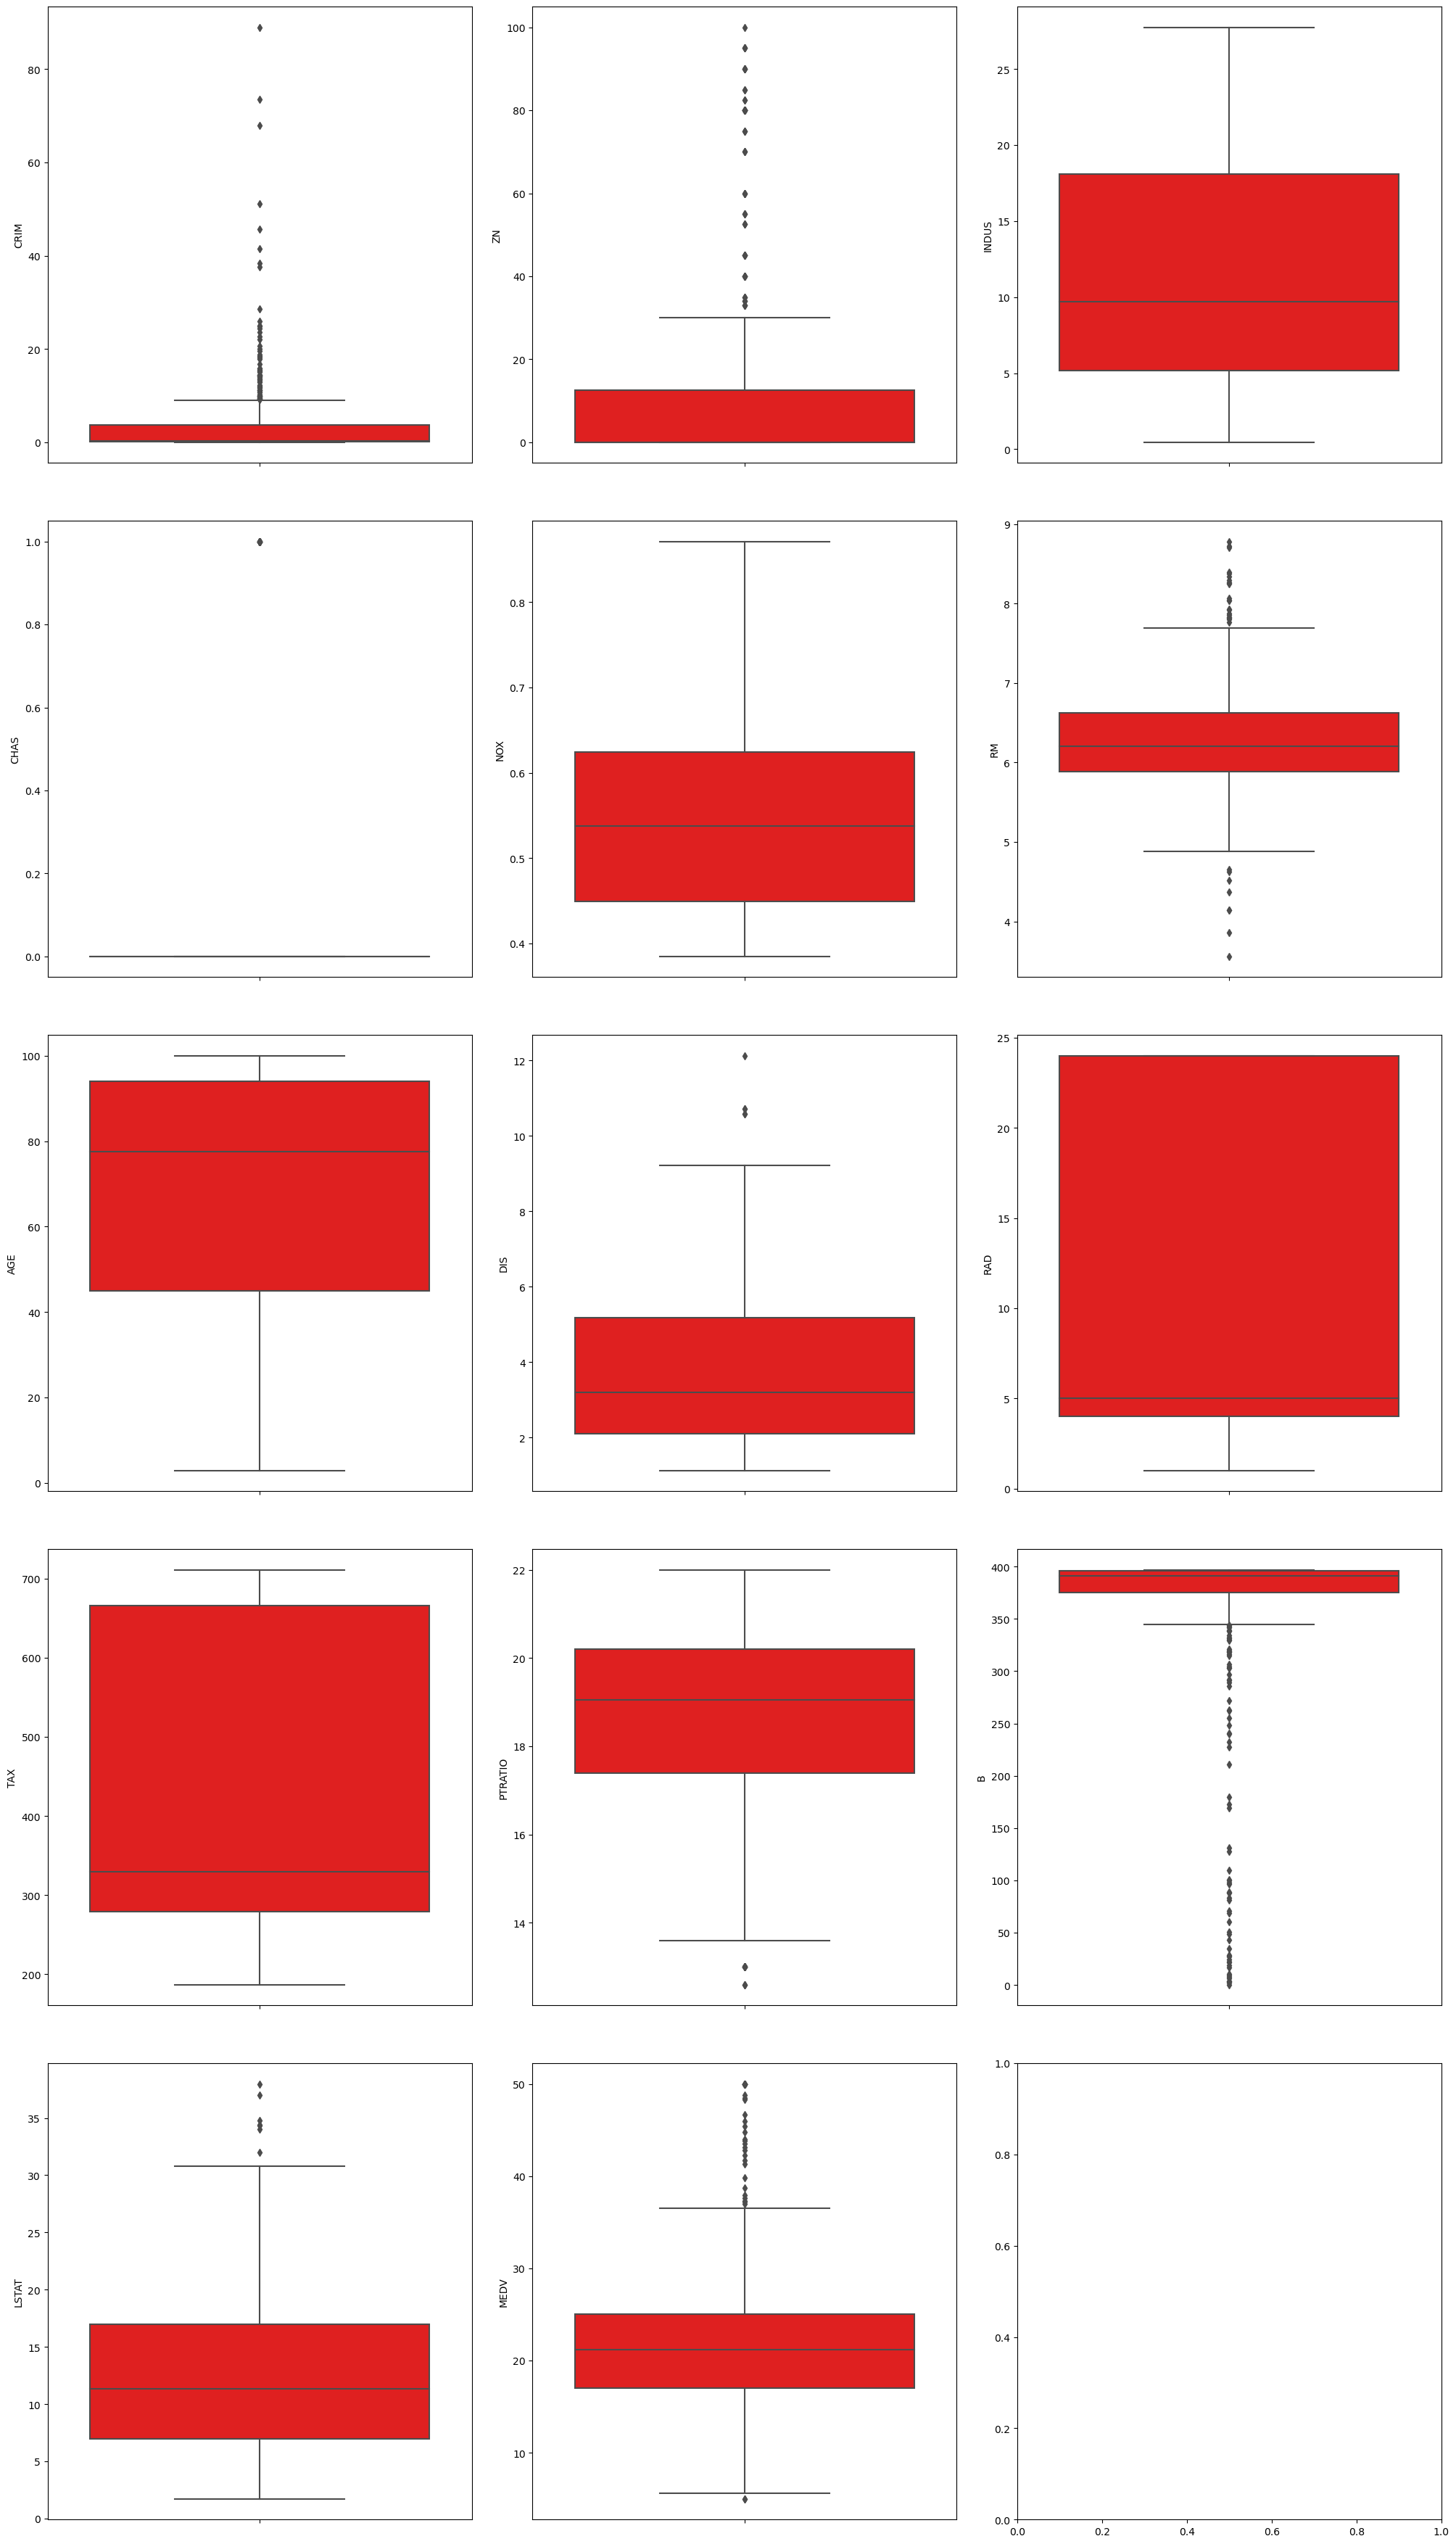

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 35))
i = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[i], color = 'r')
    i += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)

plt.show()

Podem observar que les columnes que tenen outliers, a les quals se les aplicara RobustScaler, són:
- CRIM, ZN, RM, DIS, PTRATIO, B i LSTAT 

La columna MEDV té outliers però no la transformarem, de fet serà la variable objectiu.

Les columnes sense outliers a les que se les aplicara MinMax, són:
- INDUS, NOX, AGE i TAX

La columna RAD no mostra outliers i la CHAS en mostra un, pero és que es binari.

A continuació fem un cop d'ull a les correlacions lineals.

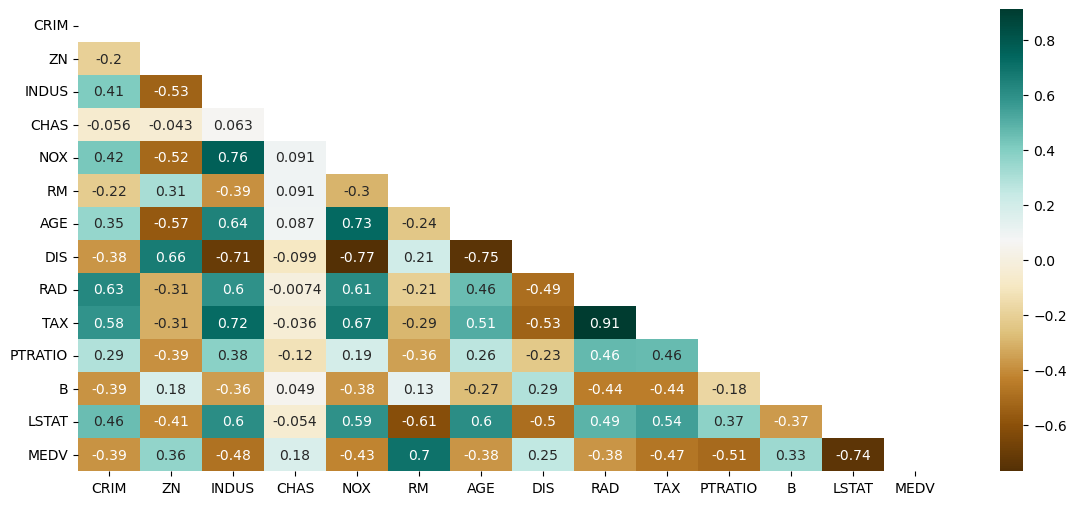

In [11]:
import numpy as np

plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(df.corr()))  # filter the double output and the main diagonal
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='BrBG')
plt.show()

Podem observar que la variable binaria (CHAS) té una correlació molt baixa. L'altra variable categórica (RAD) té algo de correlació amb TAX i CRIM.

Podem observar alguns valors de correlació bastant alts:
- MEDV amb LSTAT i RM.
- Entre les variables NOX, AGE, DIS i TAX.

Aquesta informació ens vindrà be de cara a futurs exercicis.

### Train-test
Ja hem fet un bon cop d'ull al dataset en total. A partir d'aquí, partirem el conjunt de dades adjunt en train i test. A més a més, nomenarem una variable target (y), que serà MEDV (Median value of owner-occupied homes ($1000´s)). Utilitzarem un tamany per testejar del 20 per cent.

Utilitzarem describe per comparar les estadistiques de cada set. També els boxplots per avaluar si hi han outliers.

In [12]:
x, y = df.drop('MEDV', axis=1), df['MEDV']

print('\n', x)
print('\n', y)


         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2      

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('\n', x_train)
print('\n', x_test)
print('\n', y_train)
print('\n', y_test)


          CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
42    0.14150   0.0   6.91     0  0.448  6.169   6.6  5.7209    3  233.0   
58    0.15445  25.0   5.13     0  0.453  6.145  29.2  7.8148    8  284.0   
385  16.81180   0.0  18.10     0  0.700  5.277  98.1  1.4261   24  666.0   
78    0.05646   0.0  12.83     0  0.437  6.232  53.7  5.0141    5  398.0   
424   8.79212   0.0  18.10     0  0.584  5.565  70.6  2.0635   24  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
255   0.03548  80.0   3.64     0  0.392  5.876  19.1  9.2203    1  315.0   
72    0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305.0   
396   5.87205   0.0  18.10     0  0.693  6.405  96.0  1.6768   24  666.0   
235   0.33045   0.0   6.20     0  0.507  6.086  61.5  3.6519    8  307.0   
37    0.08014   0.0   5.96     0  0.499  5.850  41.5  3.9342    5  279.0   

     PTRATIO       B  LSTAT  
42      17.9  383.37   5.81  
58      19.7  390.68   6.

In [14]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.697455,11.527228,11.077500,0.079208,0.553026,6.268792,67.935644,3.826111,9.470297,403.257426,18.438614,357.153688,12.778540
std,9.146743,23.288284,6.848412,0.270398,0.116895,0.689229,28.563186,2.120999,8.680237,169.030480,2.169469,91.541647,7.216403
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082598,0.000000,5.190000,0.000000,0.448000,5.876750,43.250000,2.105350,4.000000,277.000000,17.225000,376.092500,7.092500
50%,0.234405,0.000000,9.125000,0.000000,0.535000,6.179000,76.800000,3.298600,5.000000,329.000000,19.000000,391.575000,11.465000
75%,3.594927,20.000000,18.100000,0.000000,0.624000,6.626500,93.825000,5.141475,24.000000,666.000000,20.200000,396.157500,17.102500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
x_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.281089,10.715686,11.371569,0.029412,0.561305,6.347382,71.106863,3.671989,9.862745,427.960784,18.522549,354.774216,12.156078
std,5.997486,23.561538,6.936416,0.169792,0.112075,0.753613,26.426094,2.049614,8.849724,165.919873,2.156267,90.734074,6.846249
min,0.010960,0.000000,1.250000,0.000000,0.389000,4.138000,9.800000,1.178100,1.000000,193.000000,13.000000,7.680000,1.920000
25%,0.079020,0.000000,4.995000,0.000000,0.484000,5.984750,53.075000,2.079000,4.000000,304.000000,17.400000,371.272500,6.735000
50%,0.320380,0.000000,9.900000,0.000000,0.541000,6.326000,78.500000,2.891000,5.000000,384.000000,19.200000,390.330000,10.865000
75%,3.692268,0.000000,18.100000,0.000000,0.624000,6.611750,95.625000,5.190450,24.000000,666.000000,20.200000,396.390000,16.417500
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,29.970000


In [16]:
y_train.describe()

count    404.000000
mean      22.522277
std        8.998991
min        5.000000
25%       17.175000
50%       21.050000
75%       25.225000
max       50.000000
Name: MEDV, dtype: float64

In [17]:
y_test.describe()

count    102.000000
mean      22.574510
std        9.990289
min        6.300000
25%       16.275000
50%       21.850000
75%       24.100000
max       50.000000
Name: MEDV, dtype: float64

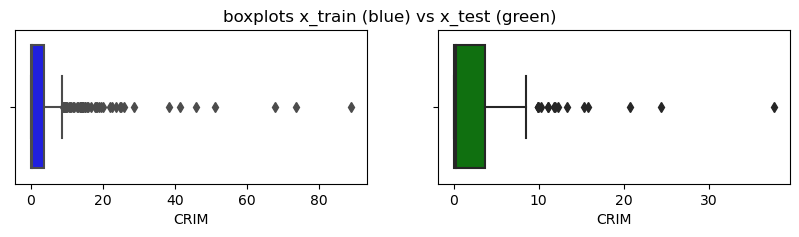

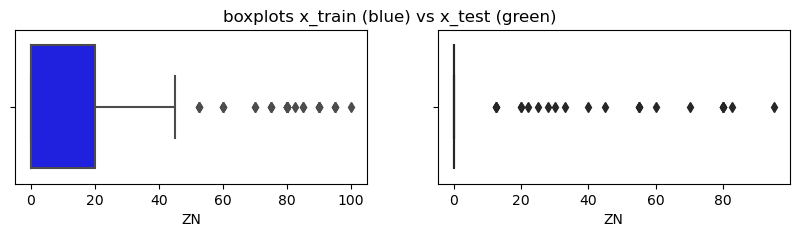

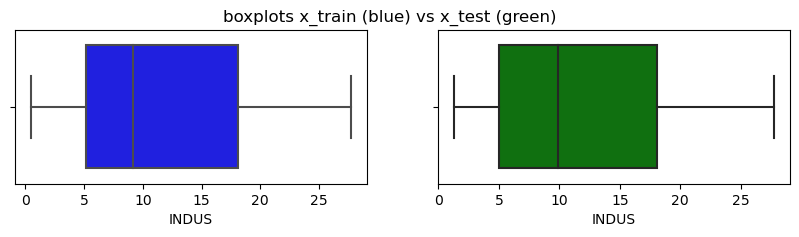

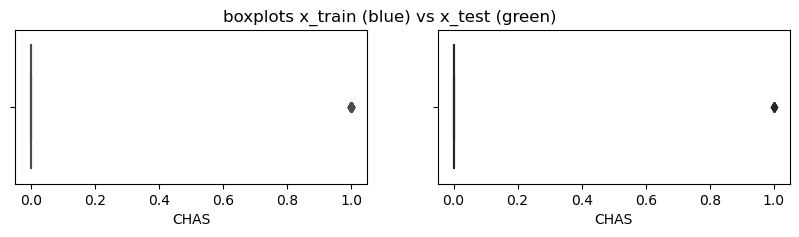

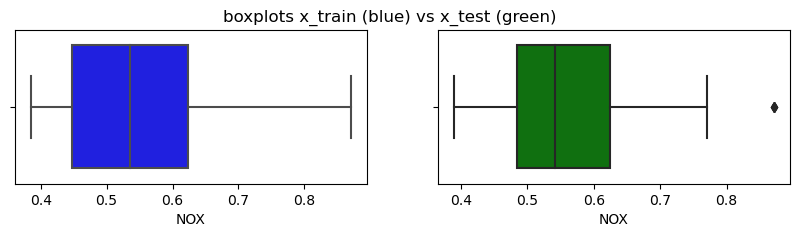

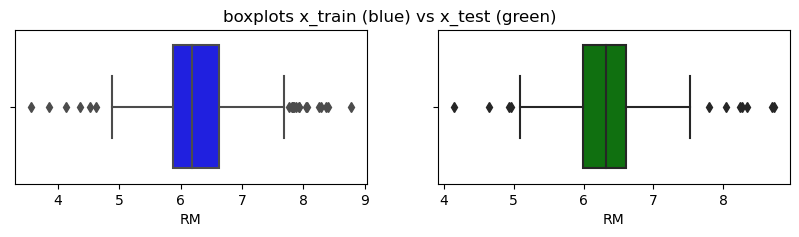

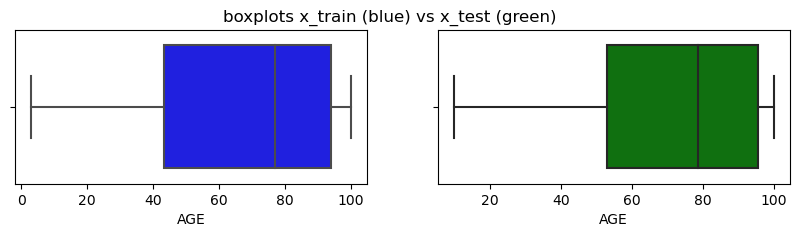

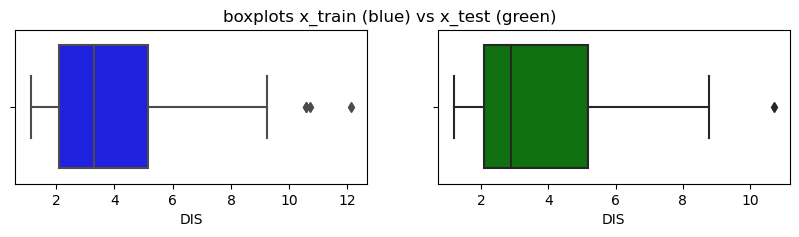

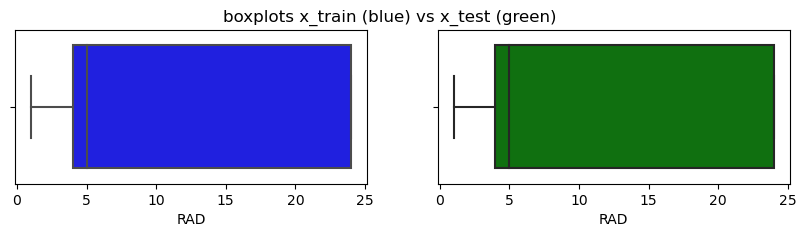

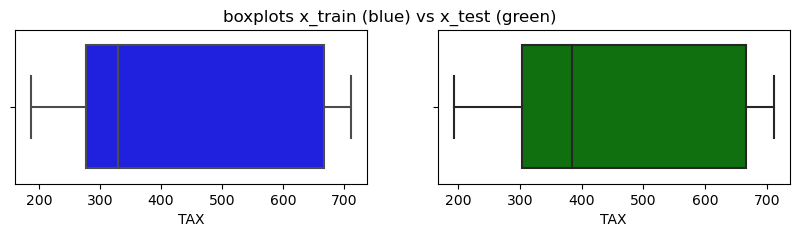

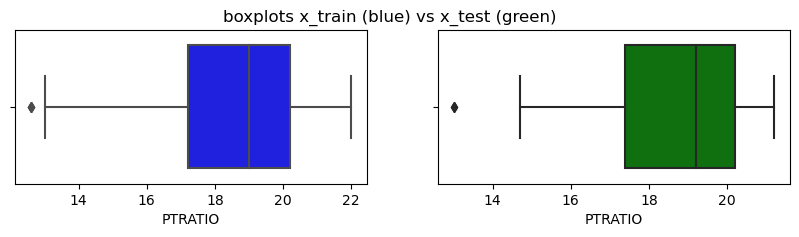

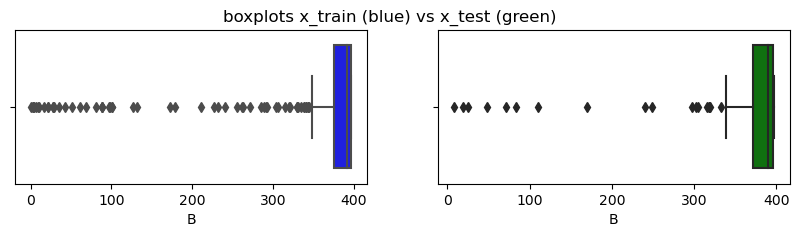

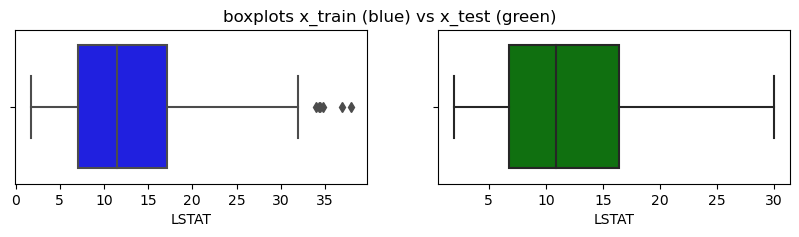

In [18]:
for column in x_train:   # x_train i x_test tenen les mateixes columnes
        fig, axes = plt.subplots(1,2, figsize = (10,2))
        fig.suptitle('boxplots x_train (blue) vs x_test (green)', fontsize=12)
        sns.boxplot(ax=axes[0], x =x_train[column], color='b')
        sns.boxplot(ax=axes[1], x =x_test[column], color='g')
plt.show()

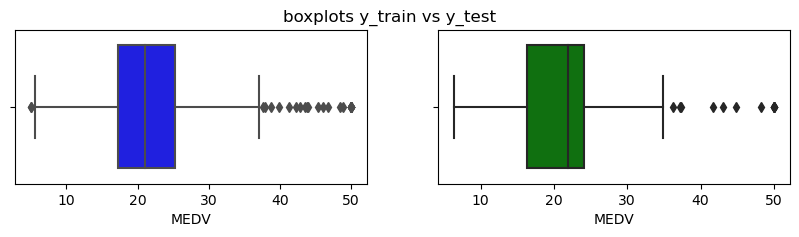

In [19]:
fig, axes = plt.subplots(1,2, figsize = (10,2))
fig.suptitle('boxplots y_train vs y_test', fontsize=12)
sns.boxplot(ax=axes[0], x =y_train, color='b')
sns.boxplot(ax=axes[1], x =y_test, color='g')
plt.show()

Podem observar que entre les mostres de train i test s'han repartit correctament en un 80 i un 20 per cent de mostres. En els boxplots es pot observar que la distribució de mostres són semblants entre train i test, amb excepció de dues variables: CRIM (amb outliers molt més llunyants a train) i ZN (als quartils).

## Exercici 2: 
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Utilitzarem el metode where de numpy per fer algunes columnes categoriques. Passarem la columna NOX (contaminació per oxids de nitrogen) als valors 'Contaminated' o 'Clean' en funció de si estan o no per sobre de la mitja. Farem una cosa equivalent amb la columna TAX (impost sobre la propietat), ho passarem a 'High tax' si està per sobre del percentil 75, 'Low tax' si està per sota del percentil 25. Sinò serà 'Medium tax'. Crearem tot això en un dataframe apart.

In [20]:
import numpy as np

df_dum = df.copy()  # fem una copia 
df_dum['NOX'] = np.where(df['NOX'] > df['NOX'].mean(), "Contaminated", "Clean")
df_dum['TAX'] = np.where(df['TAX'] > df['TAX'].quantile(0.75), "High tax",
                         (np.where(df['TAX'] < df['TAX'].quantile(0.25), "Low tax", "Medium tax")))
df_dum

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,Clean,6.575,65.2,4.0900,1,Medium tax,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,Clean,6.421,78.9,4.9671,2,Low tax,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,Clean,7.185,61.1,4.9671,2,Low tax,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,Clean,6.998,45.8,6.0622,3,Low tax,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,Clean,7.147,54.2,6.0622,3,Low tax,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,Contaminated,6.593,69.1,2.4786,1,Low tax,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,Contaminated,6.120,76.7,2.2875,1,Low tax,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,Contaminated,6.976,91.0,2.1675,1,Low tax,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,Contaminated,6.794,89.3,2.3889,1,Low tax,21.0,393.45,6.48,22.0


In [21]:
df_dummies_nox = pd.get_dummies(df_dum['NOX'])
df_dummies_nox.tail(25)

,Clean,Contaminated
481,1,0
482,1,0
483,1,0
484,0,1
485,0,1
486,0,1
487,0,1
488,0,1
489,0,1
490,0,1


In [22]:
df_dummies_tx = pd.get_dummies(df_dum['TAX'])
df_dummies_tx.tail(20)

,High tax,Low tax,Medium tax
486,0,0,1
487,0,0,1
488,1,0,0
489,1,0,0
490,1,0,0
491,1,0,0
492,1,0,0
493,0,0,1
494,0,0,1
495,0,0,1


La manera correcta d'operar és desfer-se de les columnes NOX, ja que ja tenim dues columnes binaries (Clean i Contaminated), i també desfer-se de TAX i High tax. No necessitem la columna High tax perque sabem que serà un impost alt si Low tax i Medium tax són ambdues zero.

In [23]:
df_with_dum = df.join(df_dummies_nox).join(df_dummies_tx)
df_with_dum = df_with_dum.drop(['NOX', 'TAX', 'High tax'], axis=1)
df_with_dum

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV,Clean,Contaminated,Low tax,Medium tax
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0,1,0,0,1
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6,1,0,1,0
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7,1,0,1,0
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4,1,0,1,0
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4,0,1,1,0
502,0.04527,0.0,11.93,0,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6,0,1,1,0
503,0.06076,0.0,11.93,0,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9,0,1,1,0
504,0.10959,0.0,11.93,0,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0,0,1,1,0


Tornant al nostre dataframe original i a la seva divisió en train i test, transformarem les columnes amb outliers amb RobustScaler i les columnes sense outliers amb MinMax. Ho farem tant per x_train com per x_test. Després ho ajuntarem tot en un nou datatrame "transformat".

In [24]:
from sklearn.preprocessing import RobustScaler

var_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

scaling = RobustScaler()
x_train_trans_rs = scaling.fit_transform(x_train[var_outliers])
x_test_trans_rs = scaling.transform(x_test[var_outliers])         # x_test no s'entrena!! No es fa fit!!

x_train_trans_rs_df = pd.DataFrame(x_train_trans_rs, columns=var_outliers)
x_test_trans_rs_df = pd.DataFrame(x_test_trans_rs, columns=var_outliers)

print(x_train_trans_rs_df)
print(x_test_trans_rs_df)


from sklearn.preprocessing import MinMaxScaler

var_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']   # deixem les columnes TAX i NOX, els dummies els hem deixat en un altre df.

scaling = MinMaxScaler()
x_train_trans_mm = scaling.fit_transform(x_train[var_no_outliers])
x_test_trans_mm = scaling.transform(x_test[var_no_outliers])         # x_test no s'entrena!! No es fa fit!!

x_train_tran_mm_df = pd.DataFrame(x_train_trans_mm, columns=var_no_outliers)
x_test_tran_mm_df = pd.DataFrame(x_test_trans_mm, columns=var_no_outliers)

print(x_train_tran_mm_df)
print(x_test_tran_mm_df)

         CRIM    ZN        RM       DIS   PTRATIO          B     LSTAT
0   -0.026451  0.00 -0.013338  0.797826 -0.369748  -0.408921 -0.564935
1   -0.022764  1.25 -0.045348  1.487488  0.235294  -0.044605 -0.460040
2    4.719771  0.00 -1.203068 -0.616740  0.403361   0.265387  1.932567
3   -0.050663  0.00  0.070690  0.565029 -0.100840  -0.257912  0.087413
4    2.436478  0.00 -0.818940 -0.406801  0.403361 -19.333416  0.568931
..        ...   ...       ...       ...       ...        ...       ...
399 -0.056636  4.00 -0.404135  1.950414 -0.873950   0.179666 -0.221279
400 -0.040647  0.00 -0.152051  0.655013  0.067227  -0.033142 -0.593906
401  1.605101  0.00  0.301434 -0.534168  0.403361   0.265387  0.789710
402  0.027345  0.00 -0.124041  0.116365 -0.537815  -0.738849 -0.058442
403 -0.043921  0.00 -0.438813  0.209346  0.067227   0.265387 -0.269231

[404 rows x 7 columns]
         CRIM     ZN        RM       DIS   PTRATIO          B     LSTAT
0   -0.052696  1.650  0.893631 -0.038174 -0.201681  

In [25]:
x_train_transf = pd.concat([x_train_trans_rs_df, x_train_tran_mm_df], axis=1)
x_test_transf = pd.concat([x_test_trans_rs_df, x_test_tran_mm_df], axis=1)

x_train_transf

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX
0,-0.026451,0.00,-0.013338,0.797826,-0.369748,-0.408921,-0.564935,0.236437,0.129630,0.038105,0.087786
1,-0.022764,1.25,-0.045348,1.487488,0.235294,-0.044605,-0.460040,0.171188,0.139918,0.270855,0.185115
2,4.719771,0.00,-1.203068,-0.616740,0.403361,0.265387,1.932567,0.646628,0.648148,0.980433,0.914122
3,-0.050663,0.00,0.070690,0.565029,-0.100840,-0.257912,0.087413,0.453446,0.106996,0.523172,0.402672
4,2.436478,0.00,-0.818940,-0.406801,0.403361,-19.333416,0.568931,0.646628,0.409465,0.697219,0.914122
...,...,...,...,...,...,...,...,...,...,...,...
399,-0.056636,4.00,-0.404135,1.950414,-0.873950,0.179666,-0.221279,0.116569,0.014403,0.166838,0.244275
400,-0.040647,0.00,-0.152051,0.655013,0.067227,-0.033142,-0.593906,0.379399,0.057613,0.050463,0.225191
401,1.605101,0.00,0.301434,-0.534168,0.403361,0.265387,0.789710,0.646628,0.633745,0.958805,0.914122
402,0.027345,0.00,-0.124041,0.116365,-0.537815,-0.738849,-0.058442,0.210411,0.251029,0.603502,0.229008


In [26]:
x_test_transf

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX
0,-0.052696,1.650,0.893631,-0.038174,-0.201681,0.265387,-0.393107,0.063050,0.179012,0.694130,0.066794
1,-0.059498,2.750,0.689563,0.801515,-0.470588,0.265387,-0.428072,0.121701,0.203704,0.550978,0.349237
2,-0.001462,0.000,-0.198733,0.787451,-0.369748,0.058061,0.732767,0.236437,0.129630,0.850669,0.087786
3,-0.050256,0.625,-0.401467,1.053777,-0.033613,0.230999,-0.336164,0.205645,0.049383,0.190525,0.301527
4,0.980493,0.000,-1.089697,-0.393594,0.403361,-0.537503,-0.127373,0.646628,0.792181,0.960865,0.914122
...,...,...,...,...,...,...,...,...,...,...,...
97,-0.054771,1.400,0.350784,0.120977,-0.268908,0.171194,-0.330170,0.534457,0.162551,0.522142,0.158397
98,0.023040,0.000,2.783595,-0.133130,-0.537815,-0.325193,-0.731768,0.210411,0.244856,0.776519,0.229008
99,-0.036009,0.000,0.021340,-0.171534,0.638655,0.095440,0.153347,0.296921,0.277778,0.530381,0.375954
100,3.420178,0.000,-0.456152,-0.428507,0.403361,-18.286818,0.422078,0.646628,0.409465,0.584964,0.914122


## Exercici 3: 

Resumeix les noves columnes generades de manera estadística i gràfica

Utilitzarem info() per fer un cop d'ull a les columnes. Observem que manquen les dues columnes categóriques, que no hem transformat (CHAS i RAD). A més a més val a dir que hi ha una altra columna que no hem transformat, que és la nostra y (MEDV).

Pel que fa a la x_train i x_test ja transformats, aplicarem describe() i histogrames.

In [27]:
x_train_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   RM       404 non-null    float64
 3   DIS      404 non-null    float64
 4   PTRATIO  404 non-null    float64
 5   B        404 non-null    float64
 6   LSTAT    404 non-null    float64
 7   INDUS    404 non-null    float64
 8   NOX      404 non-null    float64
 9   AGE      404 non-null    float64
 10  TAX      404 non-null    float64
dtypes: float64(11)
memory usage: 34.8 KB


In [28]:
x_train_transf.describe()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.985969,0.576361,0.119763,0.173745,-0.188701,-1.715490,0.131223,0.389205,0.345733,0.669780,0.412705
std,2.604181,1.164414,0.919278,0.698588,0.729233,4.562255,0.720919,0.251041,0.240524,0.294163,0.322577
min,-0.064938,0.000000,-3.491831,-0.714397,-2.151261,-19.499377,-0.972527,0.000000,0.000000,0.000000,0.000000
25%,-0.043221,0.000000,-0.403134,-0.393017,-0.596639,-0.771617,-0.436813,0.173387,0.129630,0.415551,0.171756
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317632,0.308642,0.761071,0.270992
75%,0.956779,1.000000,0.596866,0.606983,0.403361,0.228383,0.563187,0.646628,0.491770,0.936406,0.914122
max,25.265791,5.000000,3.469156,2.907621,1.008403,0.265387,2.647852,1.000000,1.000000,1.000000,1.000000


In [29]:
x_test_transf.describe()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.867425,0.535784,0.224585,0.122982,-0.160488,-1.834078,0.069039,0.399984,0.362767,0.702439,0.459849
std,1.707552,1.178077,1.005153,0.675076,0.724796,4.522007,0.683941,0.254267,0.230606,0.272153,0.316641
min,-0.063617,0.000000,-2.722241,-0.698423,-2.016807,-19.132569,-0.953546,0.028959,0.008230,0.071061,0.011450
25%,-0.044240,0.000000,-0.259086,-0.401696,-0.537815,-1.011837,-0.472527,0.166239,0.203704,0.516735,0.223282
50%,0.024478,0.000000,0.196065,-0.134250,0.067227,-0.062048,-0.059940,0.346041,0.320988,0.778579,0.375954
75%,0.984492,0.000000,0.577192,0.623113,0.403361,0.239970,0.494755,0.646628,0.491770,0.954943,0.914122
max,10.656030,4.750000,3.395799,2.441171,0.739496,0.265387,1.848651,1.000000,1.000000,1.000000,1.000000


El repartiment 80 - 20 per cent de mostres es manté igual. És tot bastant semblant però encara s'observen discrepàncies a les variables CRIM i ZN, igual que abans de la transformació. Això podria ser un problema en la aleatorietat de la selecció de mostres a l'hora de separar train i test.

En els histogrames que veiem a continuació s'observen els eixos horitzontals les transformacions realitzades. Canvien els intervals de l'eix horitzontal, això sí, les distribucions es mantenen igual.

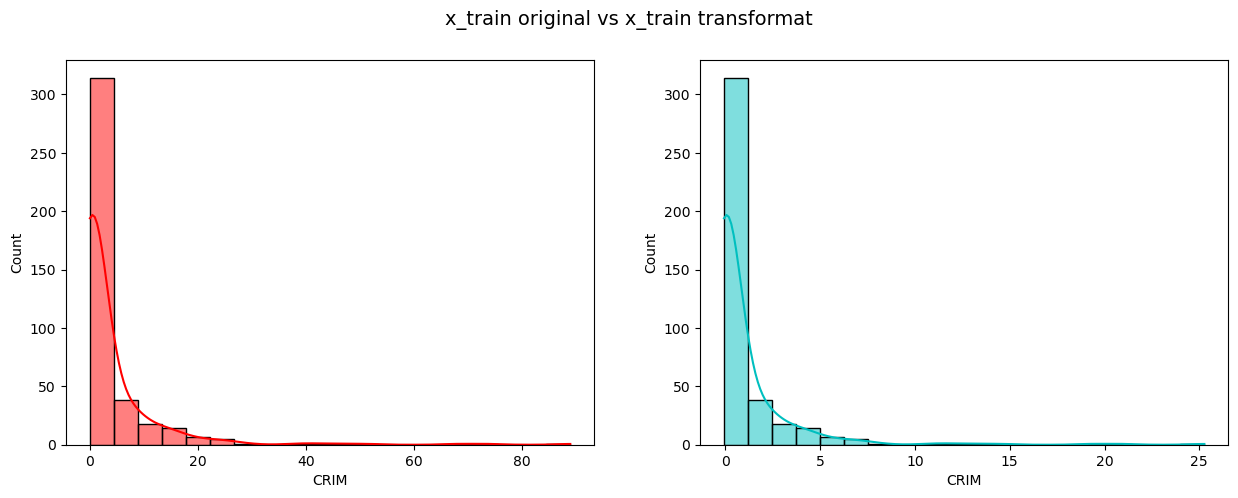

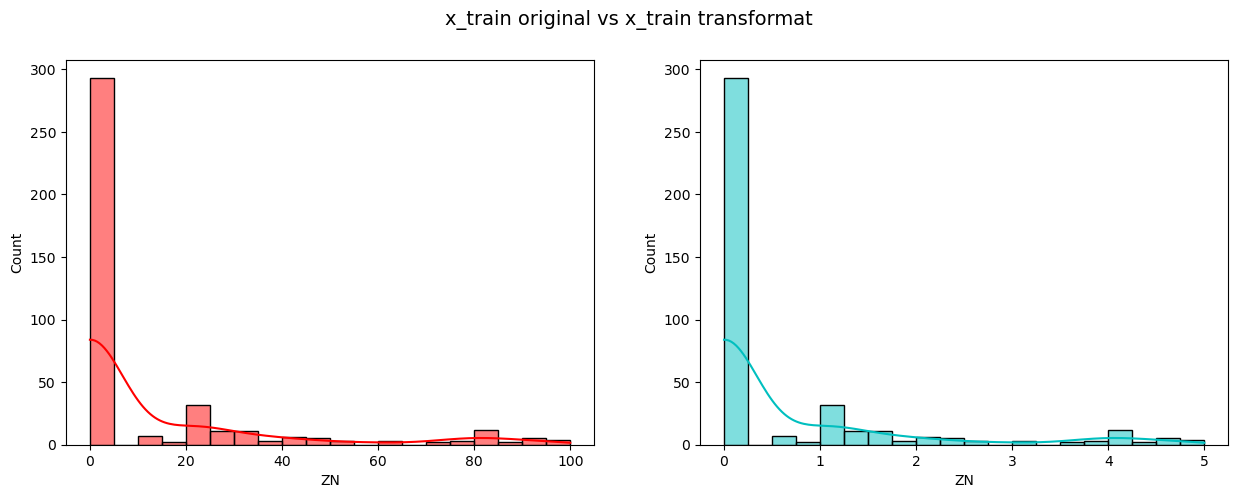

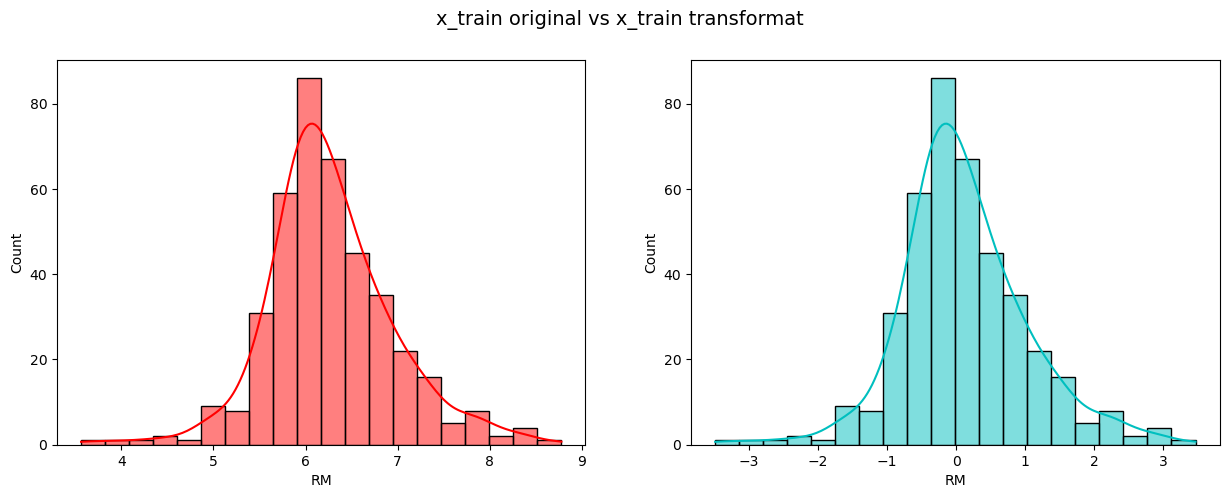

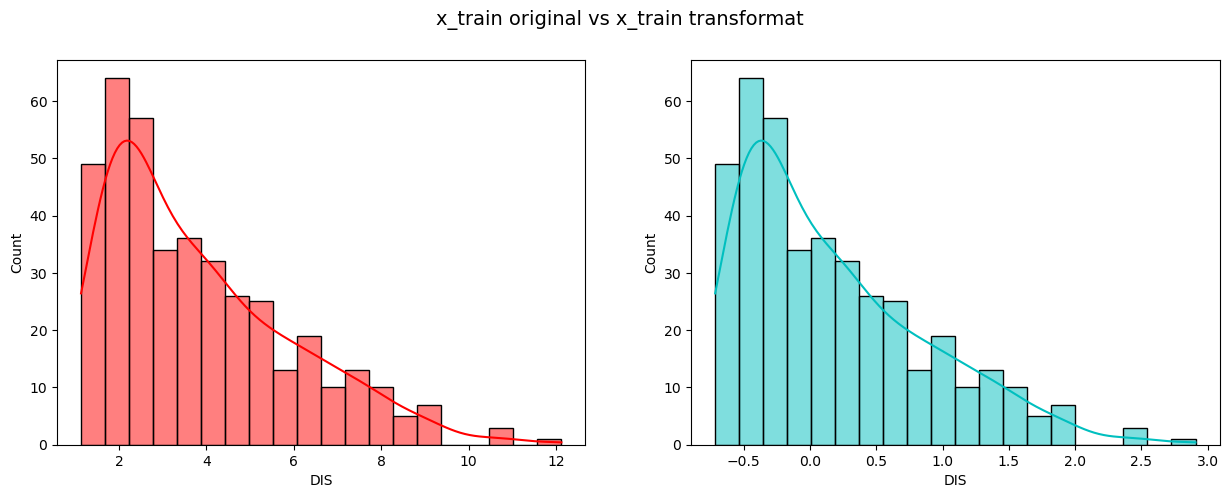

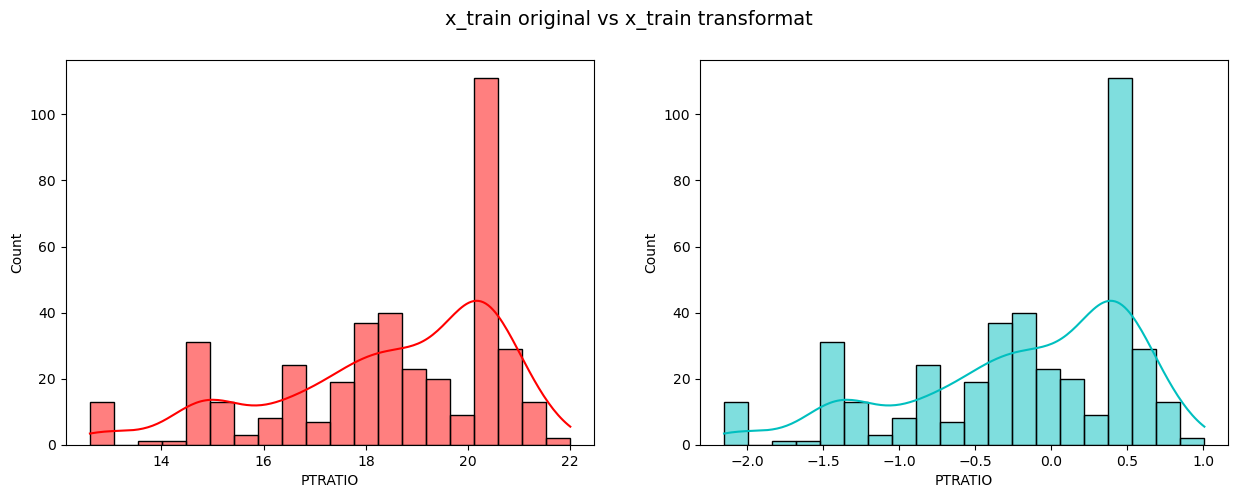

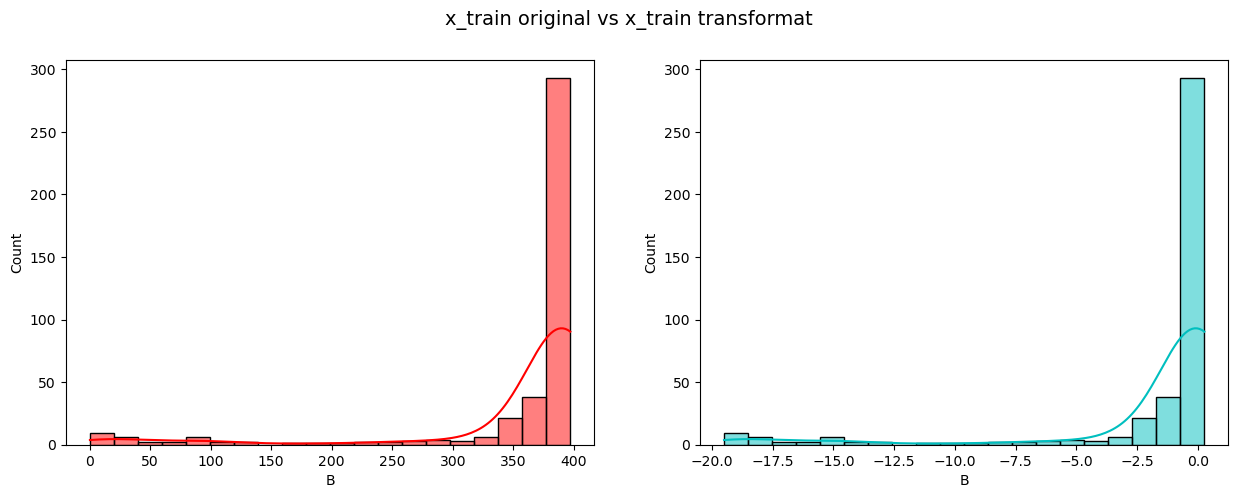

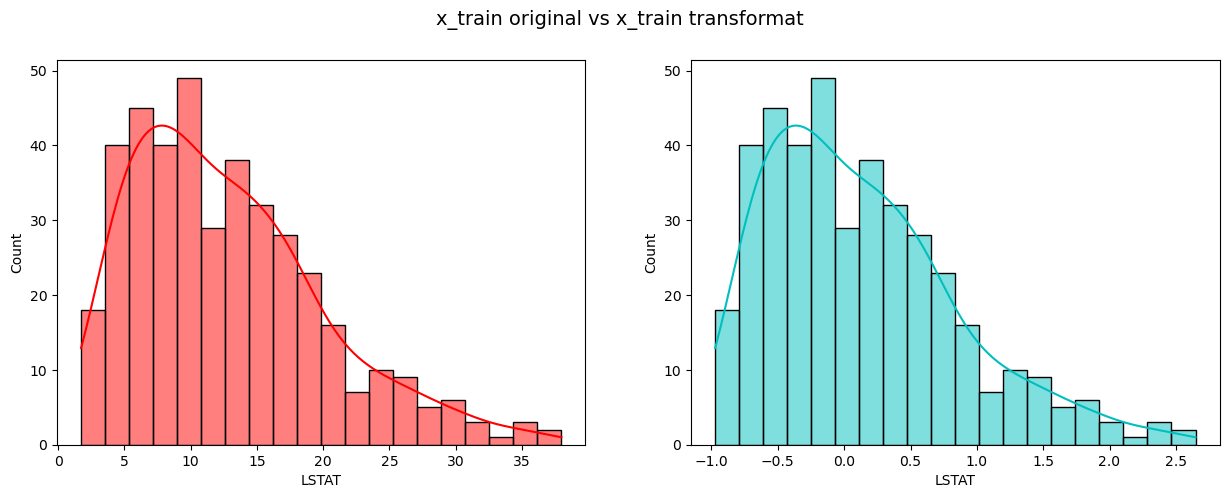

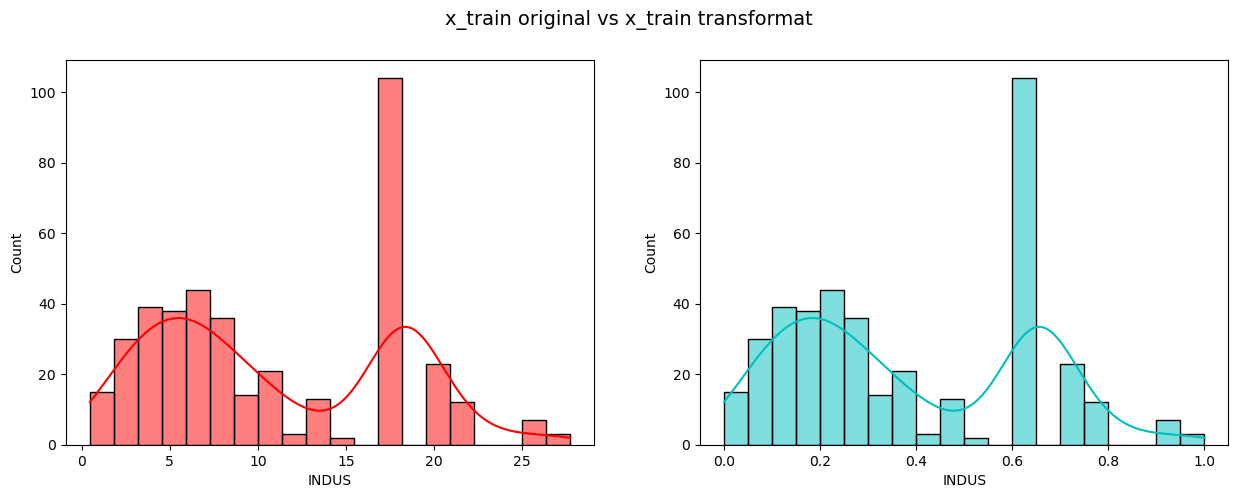

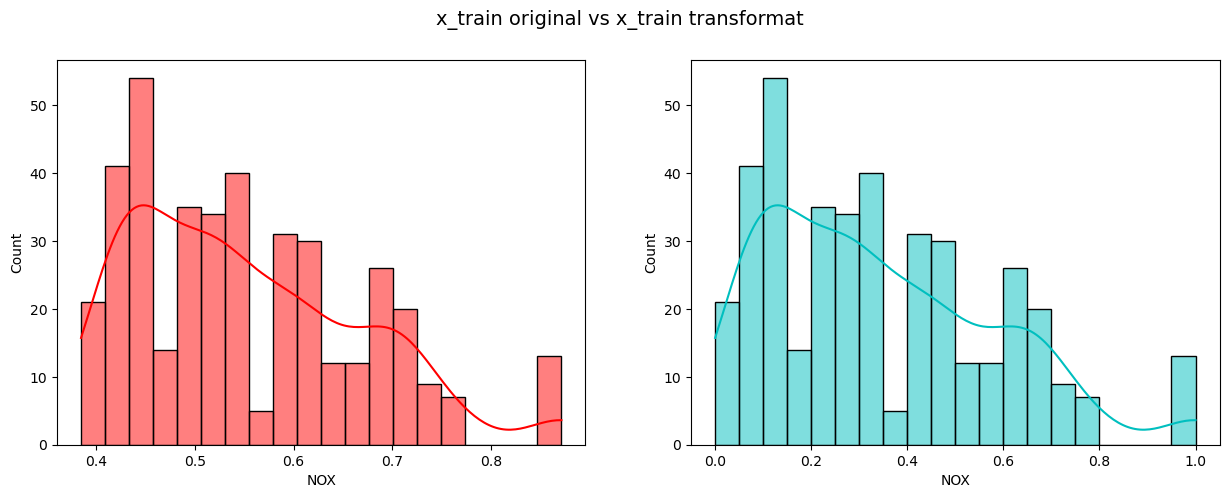

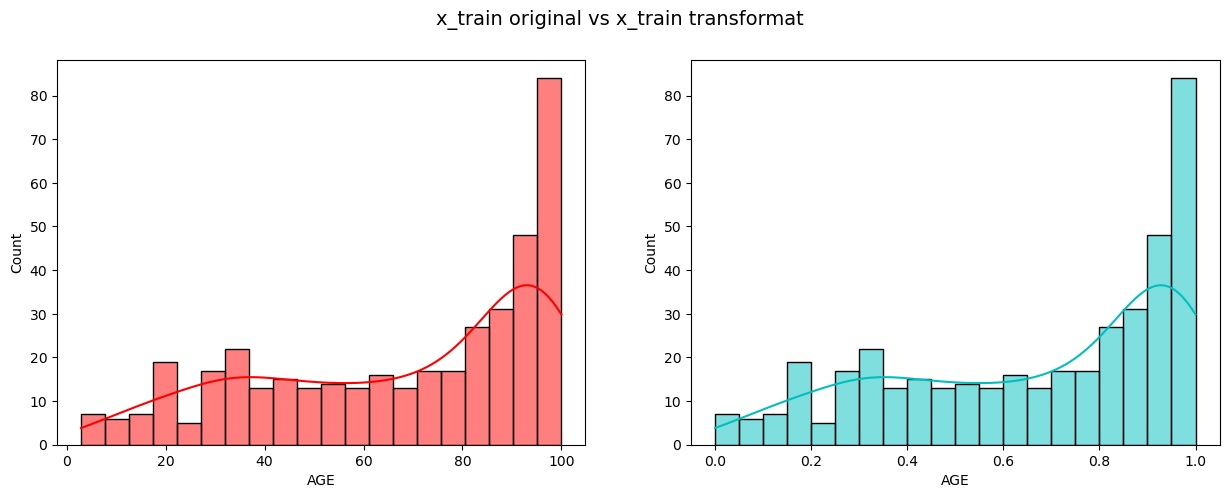

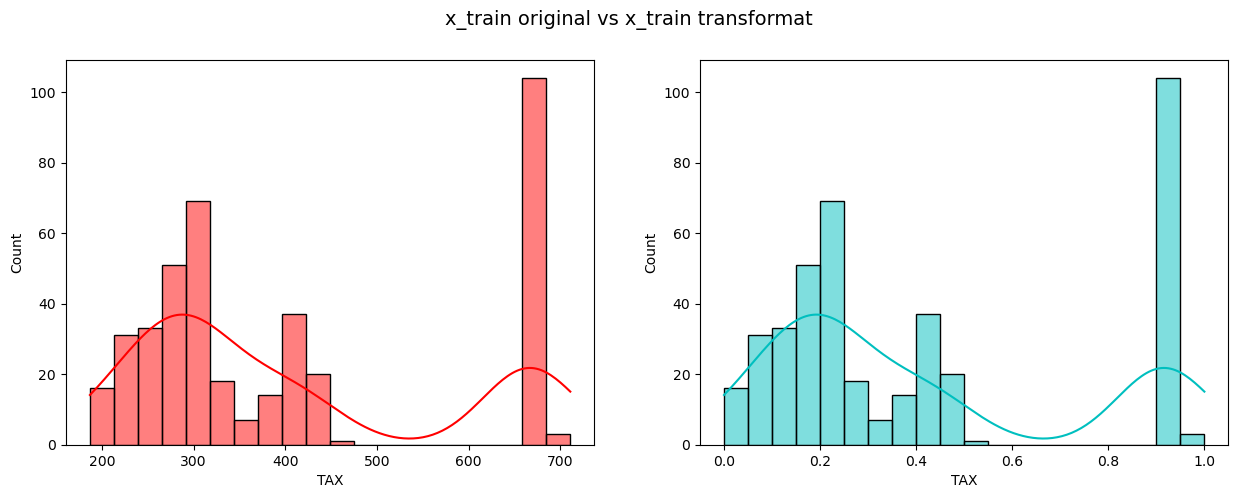

In [30]:
for column in x_train_transf:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('x_train original vs x_train transformat', fontsize=14)
        sns.histplot(ax=axes[0], data=x_train, x=x_train[column], bins=20, color='r', kde= True)
        sns.histplot(ax=axes[1], data=x_train_transf, x=x_train_transf[column], bins=20, color='c', kde= True)

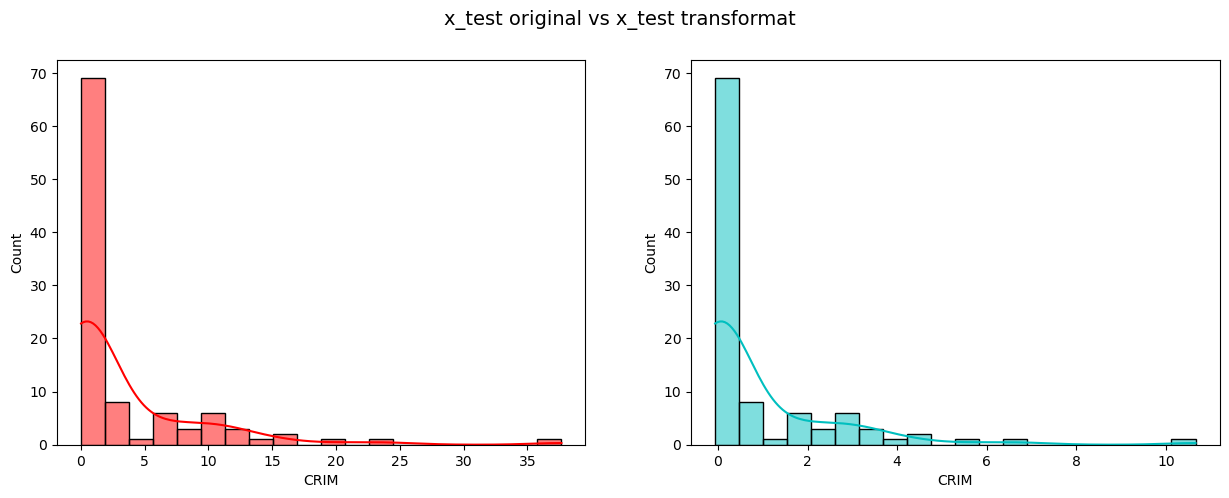

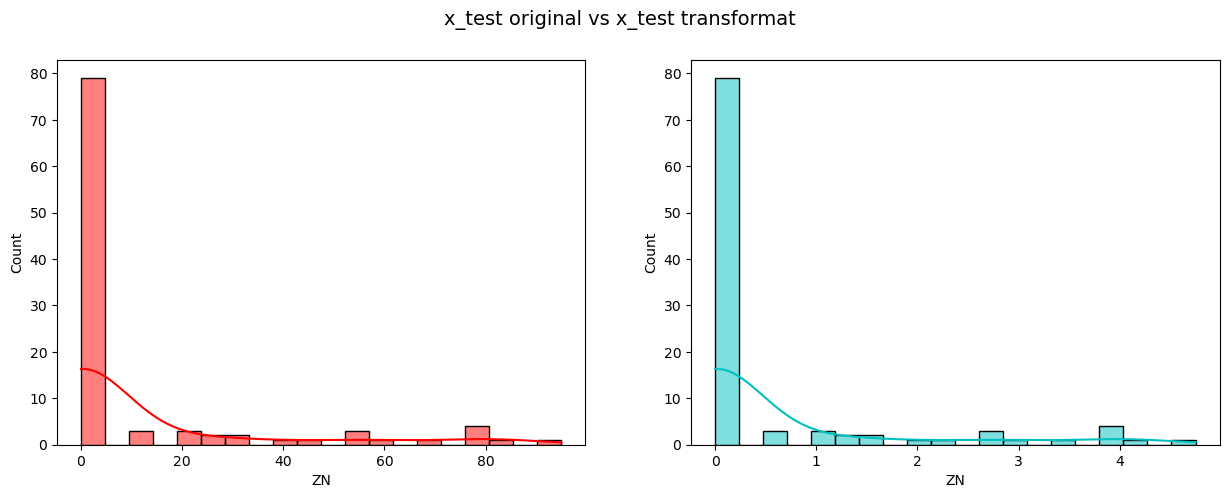

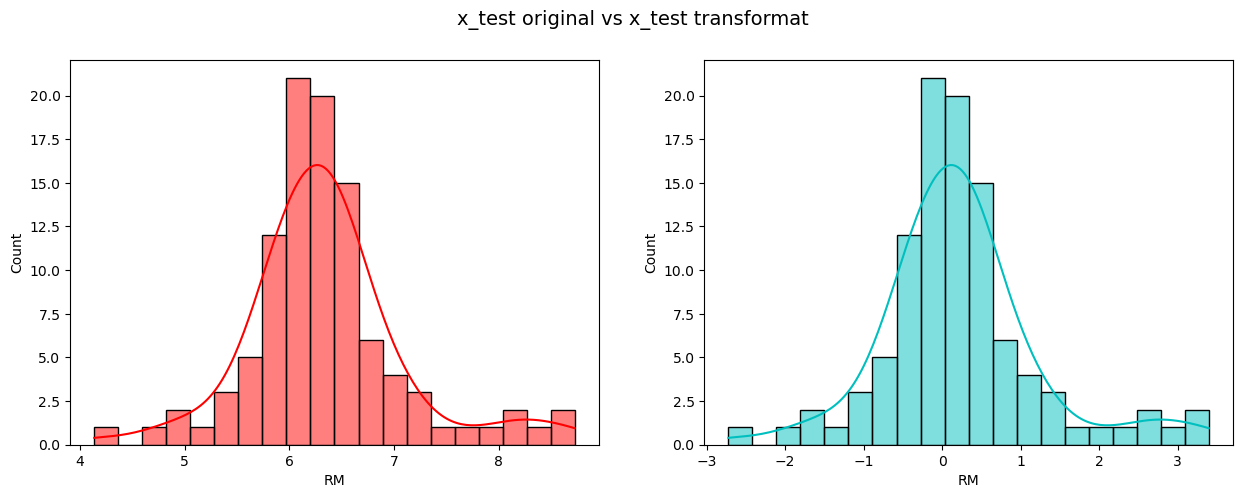

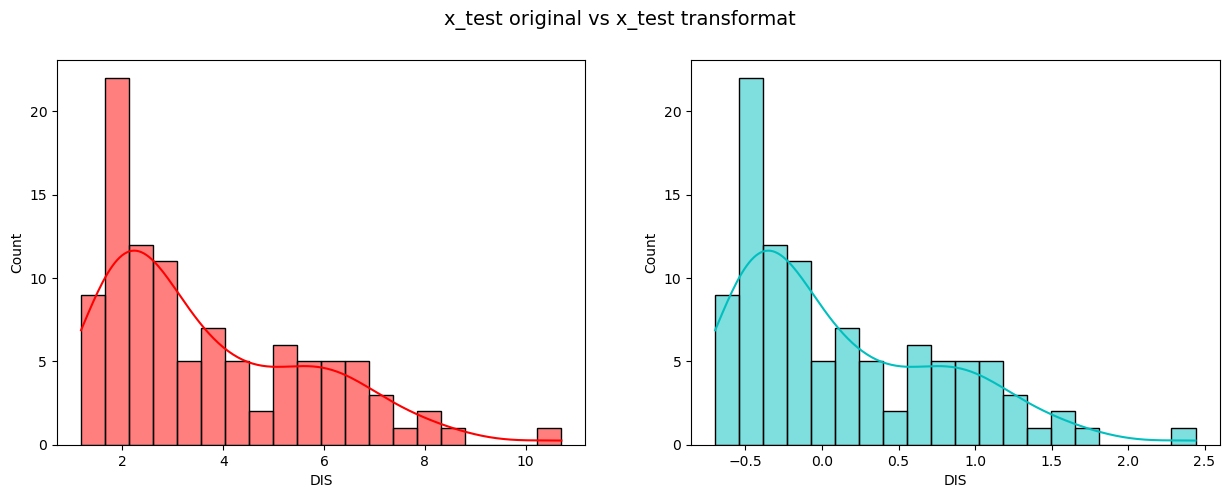

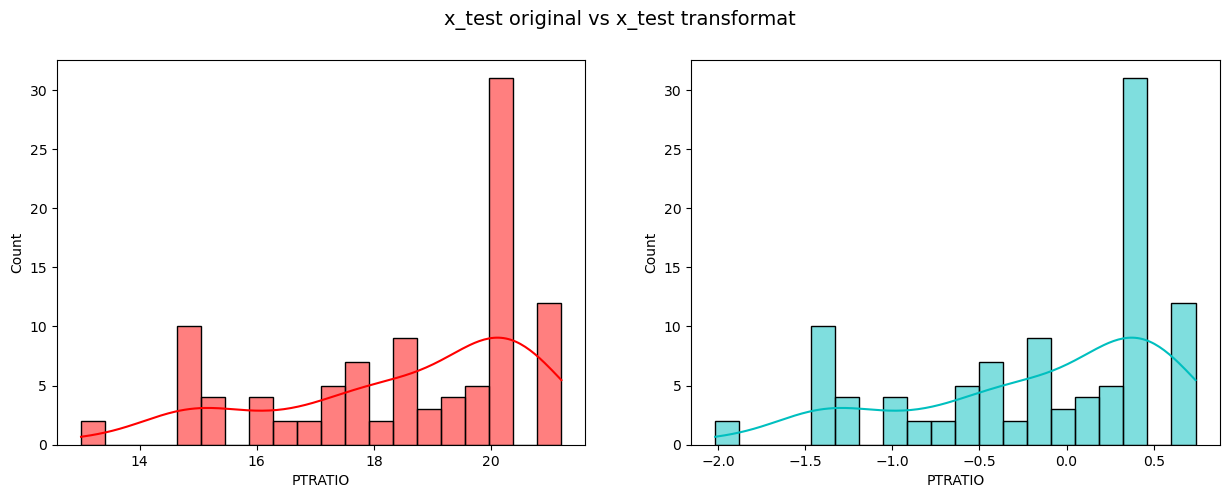

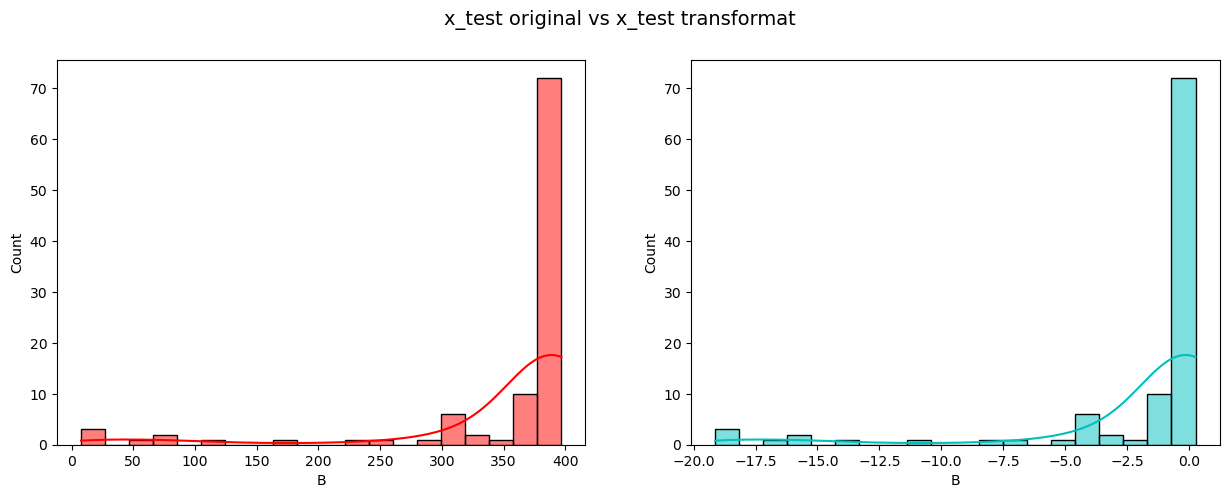

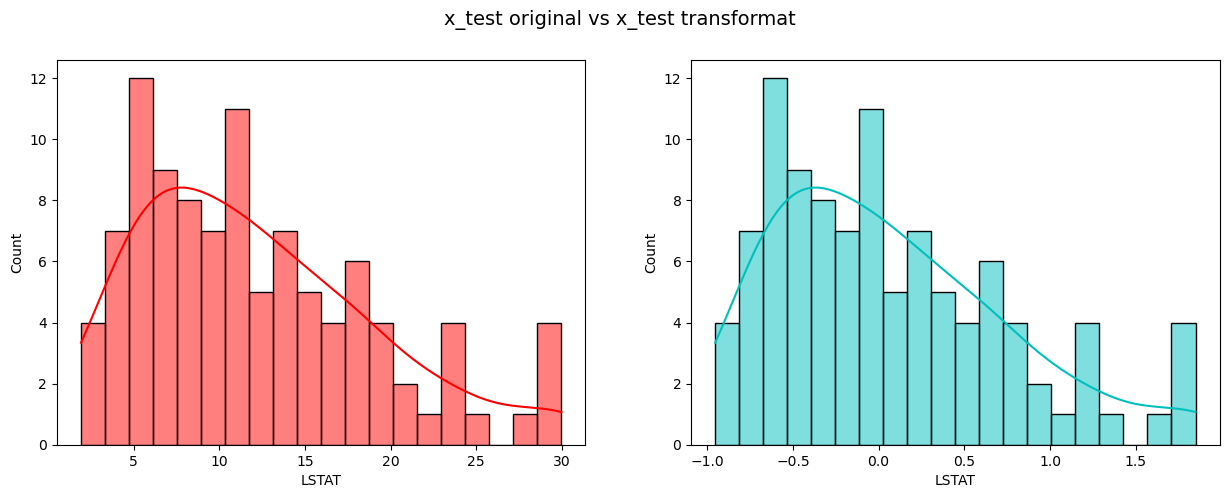

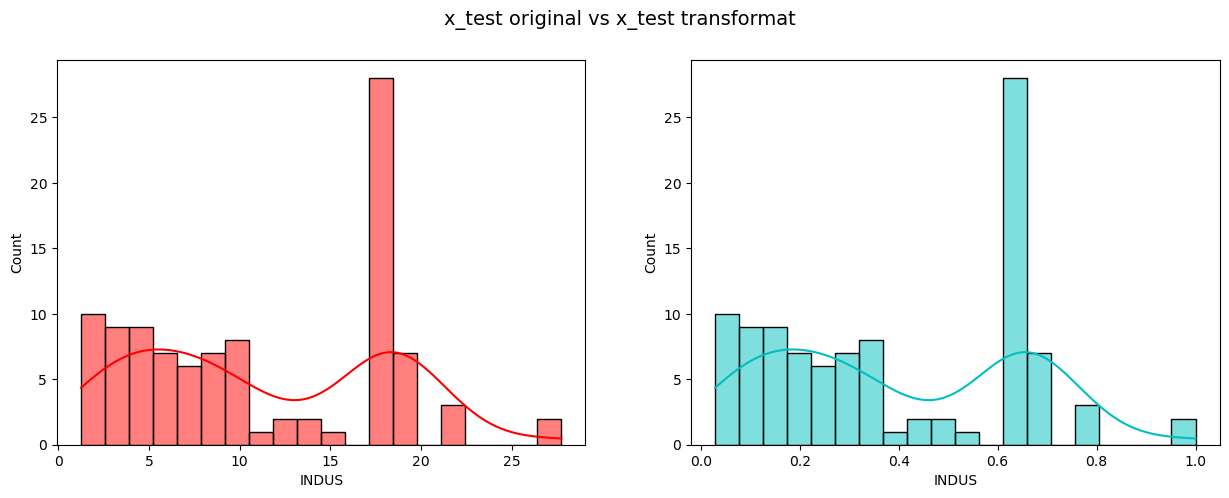

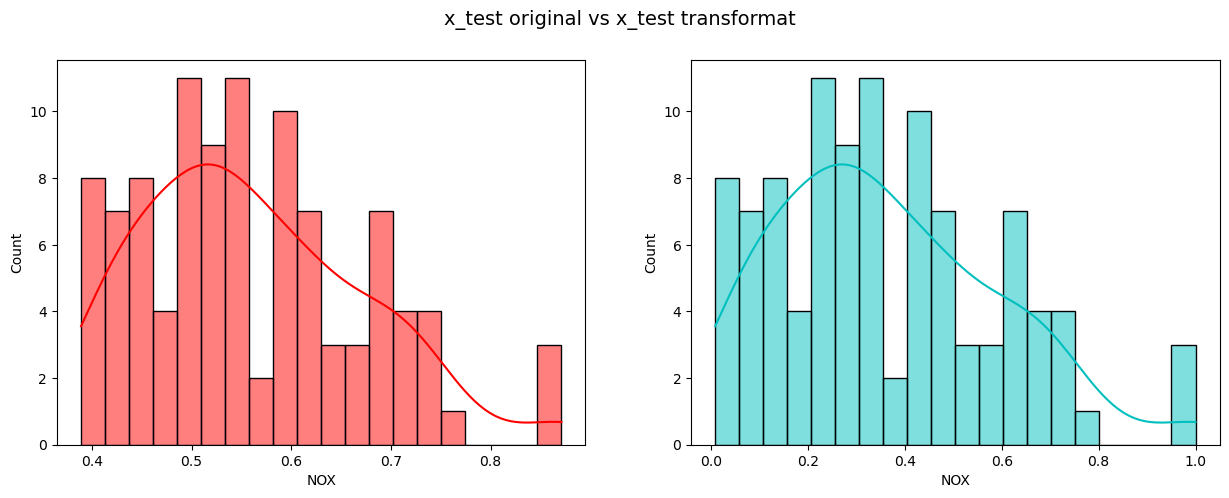

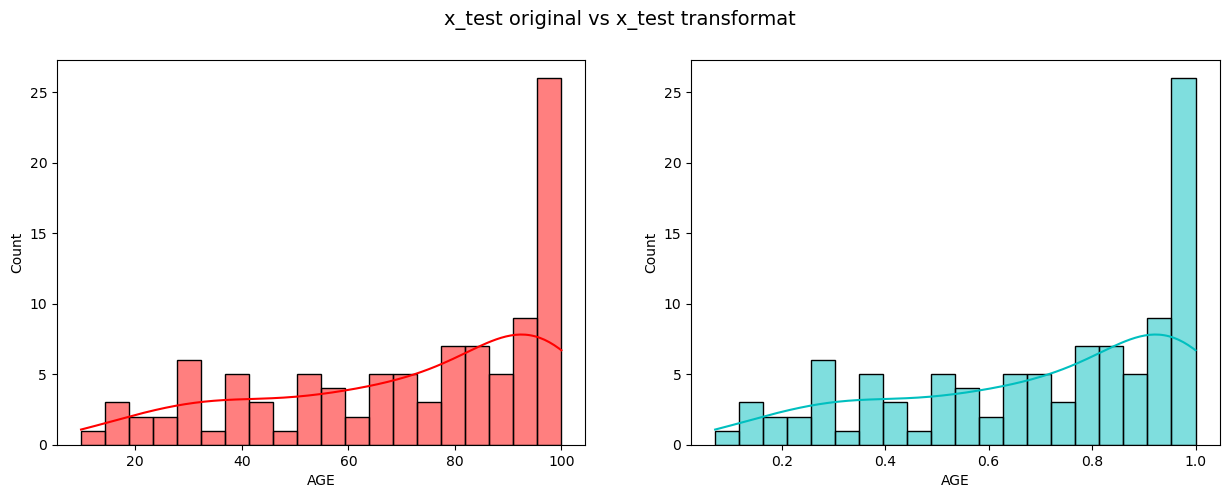

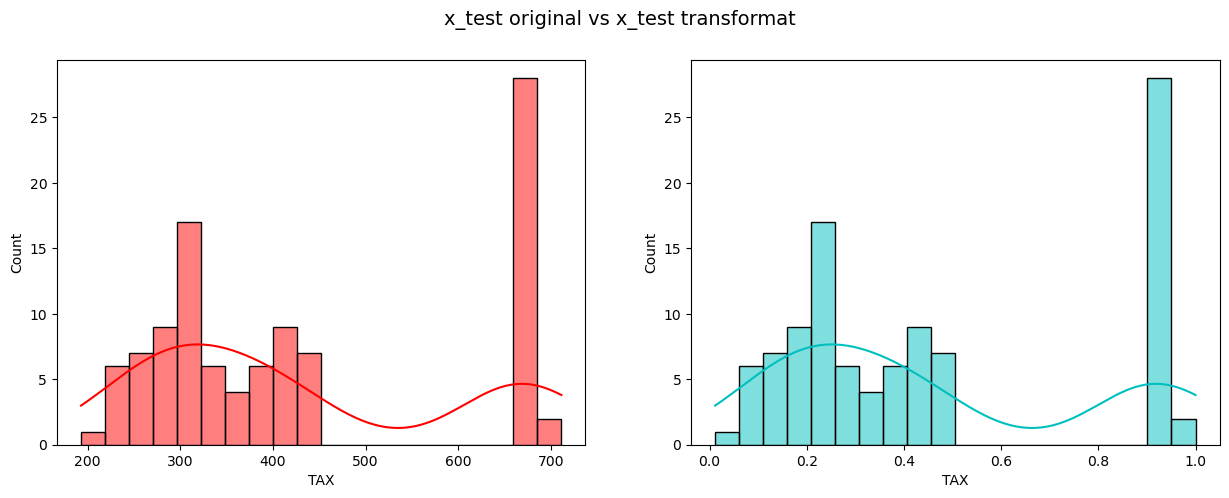

In [31]:
for column in x_test_transf:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('x_test original vs x_test transformat', fontsize=14)
        sns.histplot(ax=axes[0], data=x_test, x=x_test[column], bins=20, color='r', kde= True)
        sns.histplot(ax=axes[1], data=x_test_transf, x=x_test_transf[column], bins=20, color='c', kde= True)